# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$
Возьмите 1000 точек для графика.

красный график - прямая 
голубой график - cos(x)
оранжевый график - log(x)
зеленый график - log(x)*sin(x)



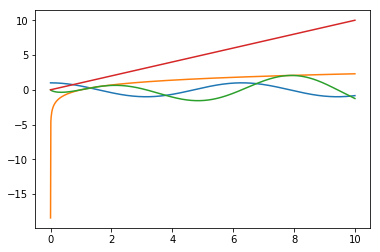

In [3]:
xa=np.linspace(0,10,1000)
xa[xa == 0] = 0.00000001#т.к. в область допустимых значений ноль не входит берем очень близкое,на фоне остальных,значение
xb =np.linspace(0,10,1000)
ya = np.log(xa)
yb = np.cos(xb)
print("красный график - прямая \nголубой график - cos(x)\nоранжевый график - log(x)\nзеленый график - log(x)*sin(x)\n")

fig = plt.figure()
plt.plot(xb,yb, xa,ya,xb,ya*np.sin(xa),xa,xa)
plt.show()


2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

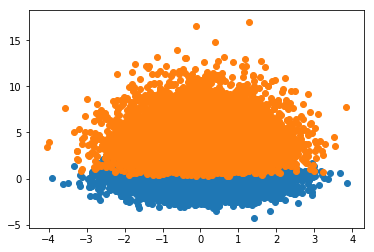

In [82]:

plt.scatter(np.random.randn(10000),np.random.randn(10000))
plt.scatter(np.random.randn(10000), np.random.gamma(4,size =10000))


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [228]:
df = pd.read_csv('data/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

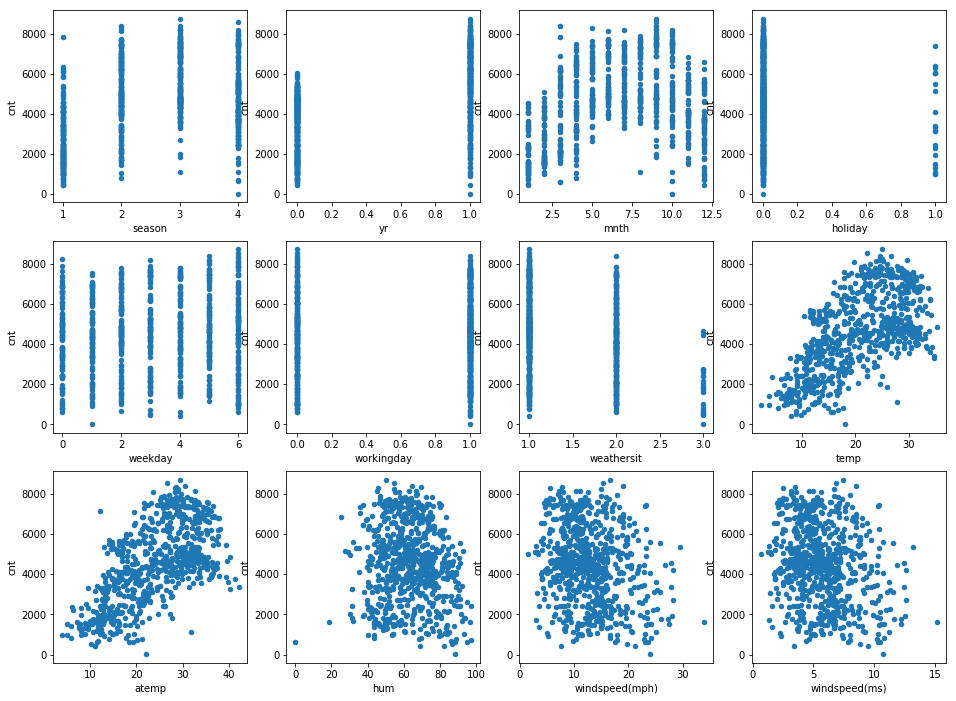

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: до середины года прямая зависимость,после середины,обратная

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:это погода,и то как погода ощущается

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ  плохая корреляция с weekday,holiday,workday,hum;лучше всего коррелирует с atemp

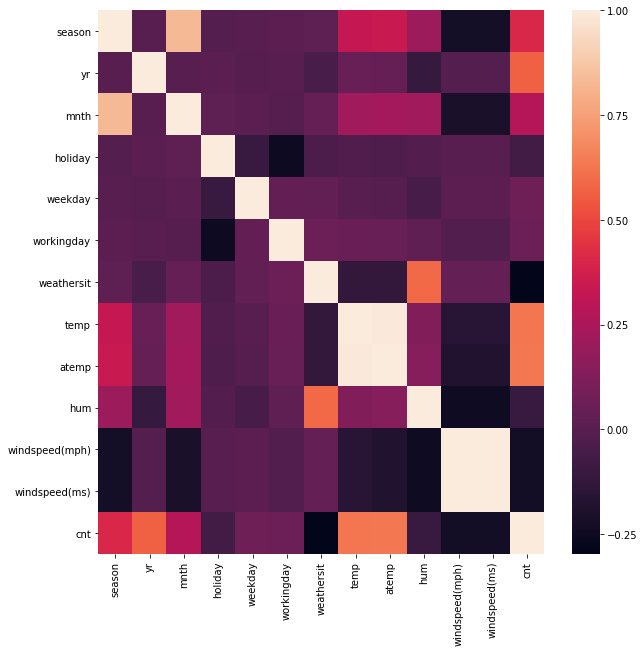

In [239]:
plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),)

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: по все видимости случайность,связанная с малым количеством  данных лет

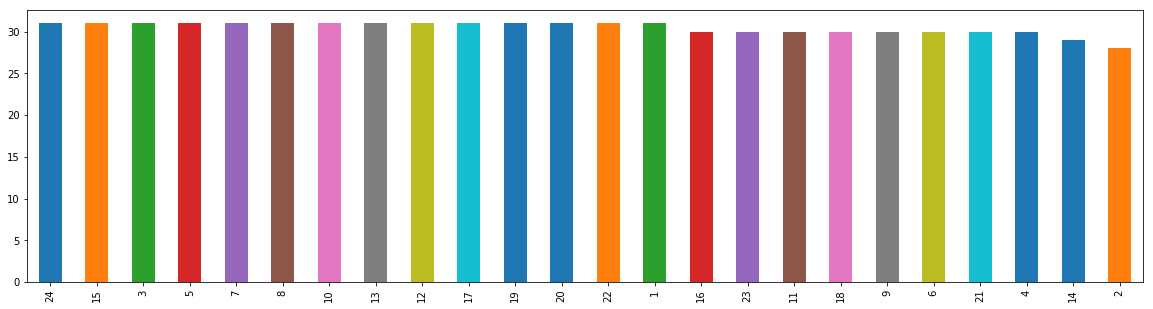

In [180]:
plt.figure(figsize = (20,5))
df.loc[df.yr == 1, 'mnth'] = df[df['yr'] == 1]['mnth'] +12 #локально меняем датасет
df['mnth'].value_counts().plot.bar()
df.loc[df.yr == 1, 'mnth'] = df[df['yr'] == 1]['mnth'] -12  #возвращаем все




## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: По всей видимости,кого то интересовала зависимость арендованных велосипедов от определенных факторов и тот,кого это заинтересовало,стал собирать данные,с целью провести анализ
    
Ответ:равномерное распределение,ведь сумма количества одного признака находится в отрезке [104;105],а сам признак принадлежит отрезку [0,6], что характерно для равеномерного распределения

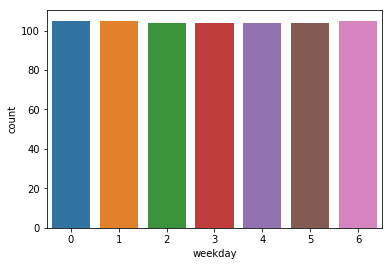

In [233]:
sns.countplot(data=df,x= 'weekday')


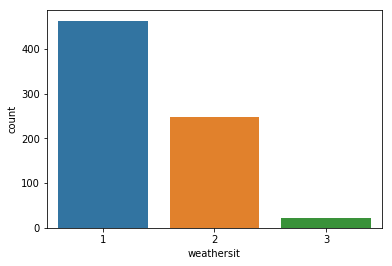

In [234]:
sns.countplot(data=df,x= 'weathersit')

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 4400-4600

Ответ:нормальное распределение

/home/demon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


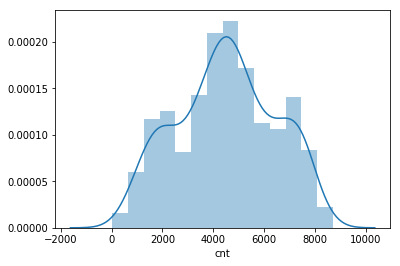

In [236]:

sns.distplot(df['cnt'].dropna())


## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: нет ничего удивительного  в линейной зависимости температуры и ощущением температуры,при учете,что коэффицент кореляции в heatmap выше показывал очень высокое значение.Есть отклонения,незначительные,вероятно это ошибка,ведь маловероятно,что человек при 30 градусах будет говорить,что ощущает их как 13-12 градусов

/home/demon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/demon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


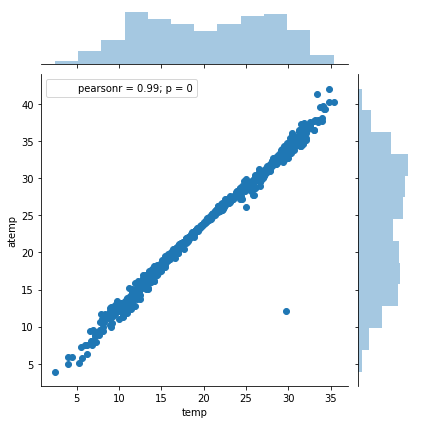

In [186]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ:на это могут влиять множество факторов,на основе данных очень трудно сделать вывод,но может быть в январе это связанно с большим количеством нерабочий дней,в июли с разгаром отдыха на природе летом,в выходные,в апреле с расцветанием природы,и с желанием ее наблюдать в больших растояниях,опять же в выходной день.

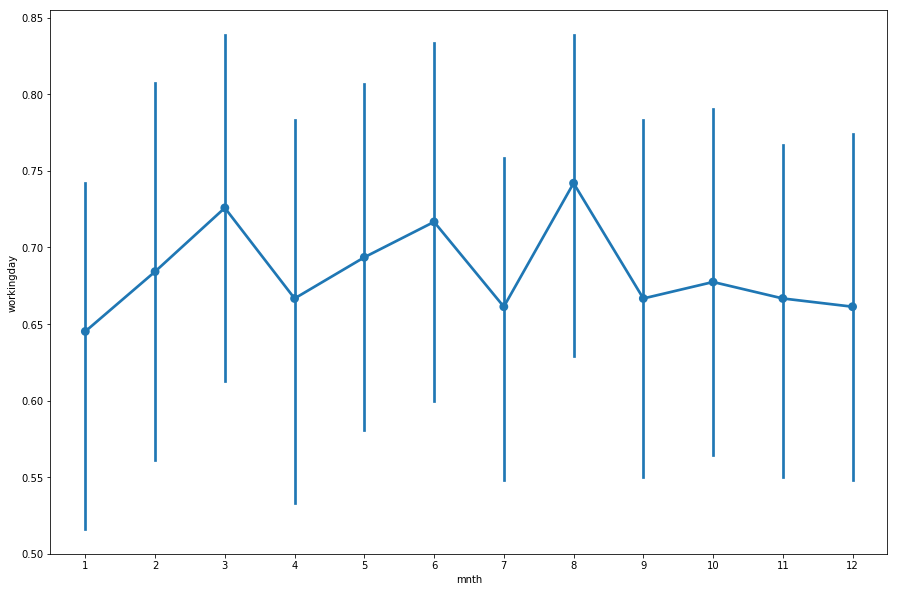

In [242]:

plt.figure(figsize=(15,10))
sns.pointplot(x='mnth', y='workingday', data=df)

## 8. Хитрый вопрос (3 балла)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:пусть будет новый признак,магическая колонка,полученная вычитам колонки ощущаемой температуры с колонкой реальной температуры,следовательно,если ощущаемая температура меньше чем реальная,то значения магической колонки отрицательно,на основе этого,можно легко графически увидеть как много отрицательных значений.Если взять по оси горизонатльной скорость ветра,а по вертикальной значения магической колонки,то можно увидеть зависимость скорости ветра от ощущении температуры,как видно из графиков почти всегда(за исключением двух точек) точки лежат выше  вертикальной оси,следовательно  от сильного ветра людям не кажется,что на улице холоднее.

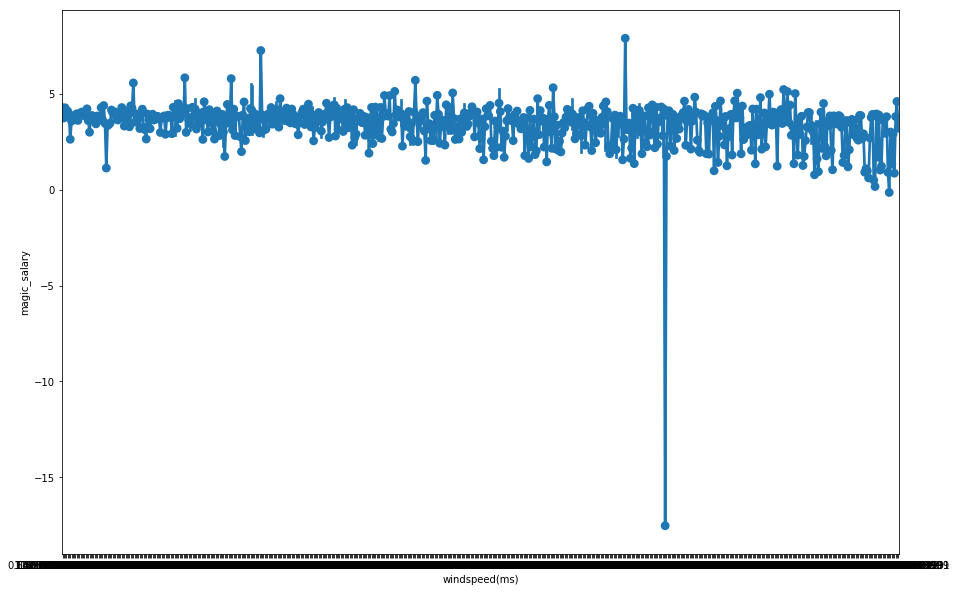

In [223]:
value = np.array(df['atemp']) - np.array(df['temp'])
se = pd.Series(value)
df['magic_colum'] = se.values
plt.figure(figsize=(15,10))
sns.pointplot(x='windspeed(ms)', y='magic_colum', data=df)
